In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

breast_cancer_df = pd.read_csv('breast-cancer.csv')
covid_df = pd.read_csv('covid.csv')

#### Type of trial: intervention (drug, procedure etc.)

In [4]:
## Function that gets the intervention
def get_interventions(df):
    cleaned_data = []

    # Iterate over each row in the original dataframe
    for index, row in df.iterrows():
        interventions = row['Interventions'].split('|')


        # Iterate over each intervention
        for intervention in interventions:
            type_name = intervention.split(':')
            type = type_name[0].strip()
            name = type_name[1].strip()

            # Append the cleaned data to the new dataframe
            cleaned_data.append({'trial_id': index, 'Type': type, 'Name': name})

    cleaned_df = pd.DataFrame(cleaned_data)

    return cleaned_df

breast_cancer_intervention_df = get_interventions(breast_cancer_df)
covid_intervention_df = get_interventions(covid_df)


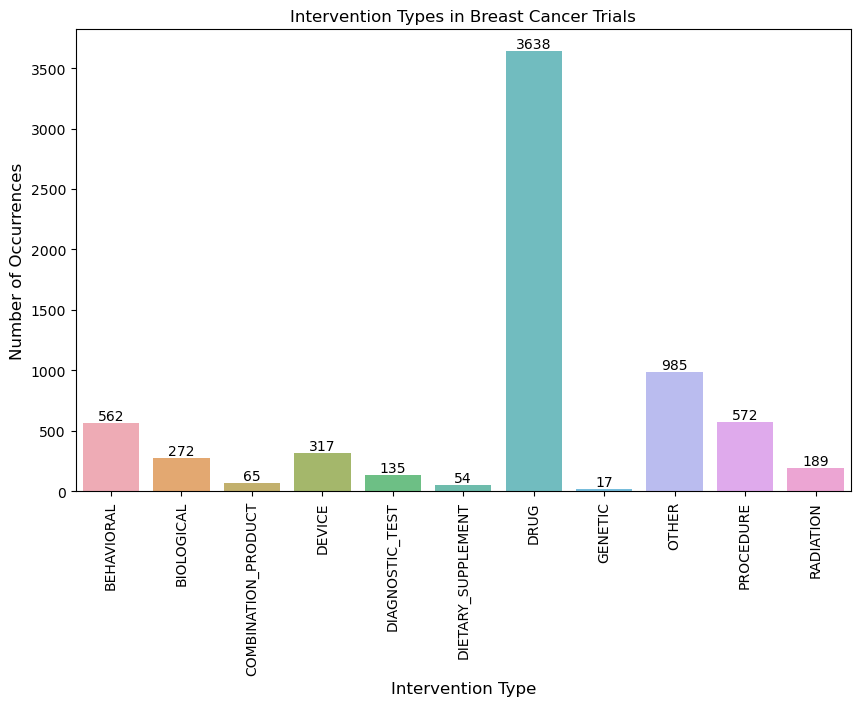

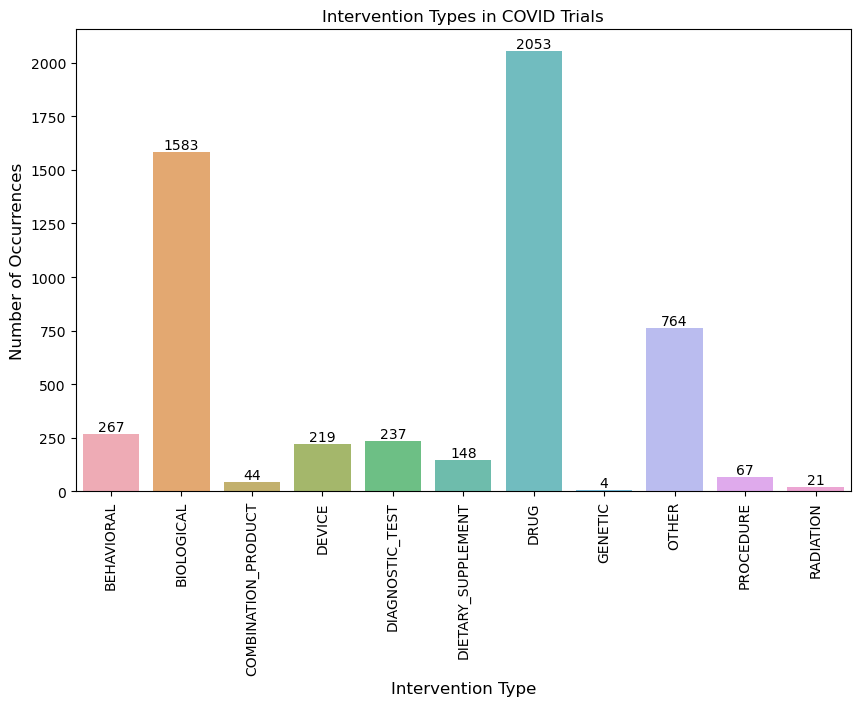

In [5]:
## Bar plot ##

def plot_intervention_types(df, title):
    # Count the frequency of each intervention type
    type_counts = df['Type'].value_counts()

    # Sort the values alphabetically
    type_counts = type_counts.sort_index()

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x=type_counts.index, y=type_counts.values, alpha=0.8)

    # Add the actual values on top of each bar
    for i, value in enumerate(type_counts.values):
        barplot.text(i, value, value, ha='center', va='bottom')

    plt.title(title)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Intervention Type', fontsize=12)

    # Rotate x labels for better visibility
    plt.xticks(rotation=90)

    plt.show()


plot_intervention_types(breast_cancer_intervention_df, 'Intervention Types in Breast Cancer Trials')

plot_intervention_types(covid_intervention_df, 'Intervention Types in COVID Trials')

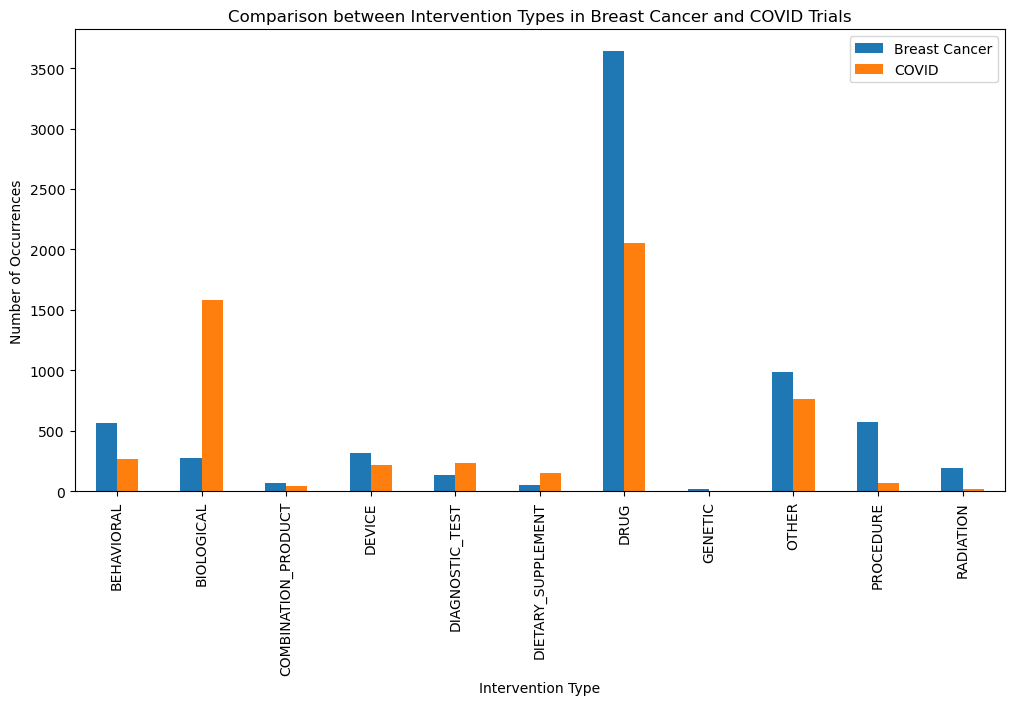

In [6]:
## Side by Side Bar Plot ##

# Count the frequency of each intervention type in each dataset
breast_cancer_interventionType_counts = breast_cancer_intervention_df['Type'].value_counts()
covid_counts_interventionType_counts = covid_intervention_df['Type'].value_counts()

# Create a new DataFrame with these counts
df = pd.DataFrame({'Breast Cancer': breast_cancer_interventionType_counts, 'COVID': covid_counts_interventionType_counts})

# df = df.sort_values(by='Breast Cancer', ascending=False)
# sort alphabetically
df = df.sort_index()

# Fill NaN values with 0
df = df.fillna(0)

# Plot the DataFrame using pandas' built-in plot function
df.plot(kind='bar', figsize=(12, 6))

plt.title('Comparison between Intervention Types in Breast Cancer and COVID Trials')
plt.ylabel('Number of Occurrences')
plt.xlabel('Intervention Type')

plt.show()

#### Activity status: inactive, etc.

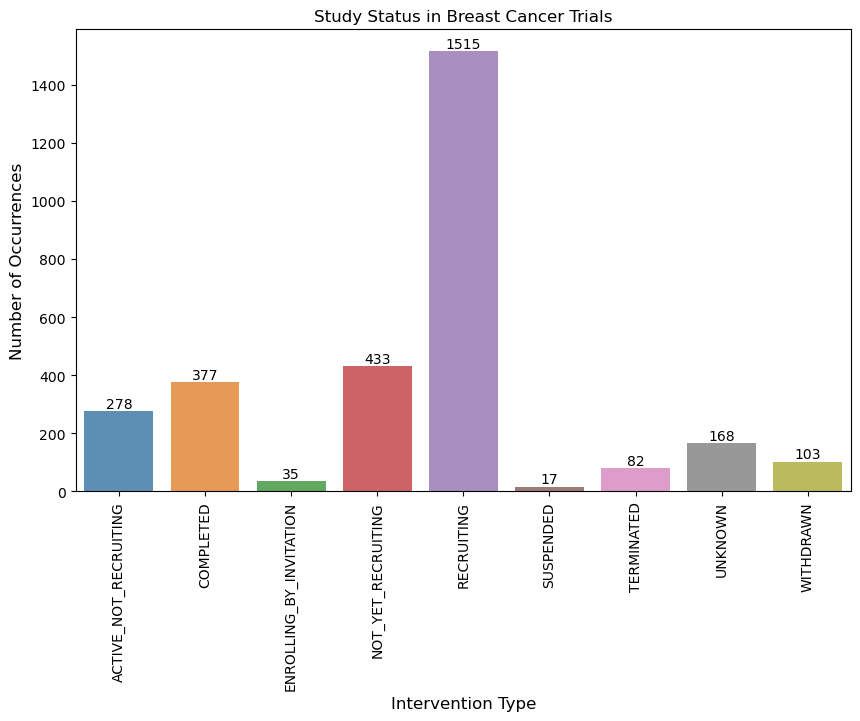

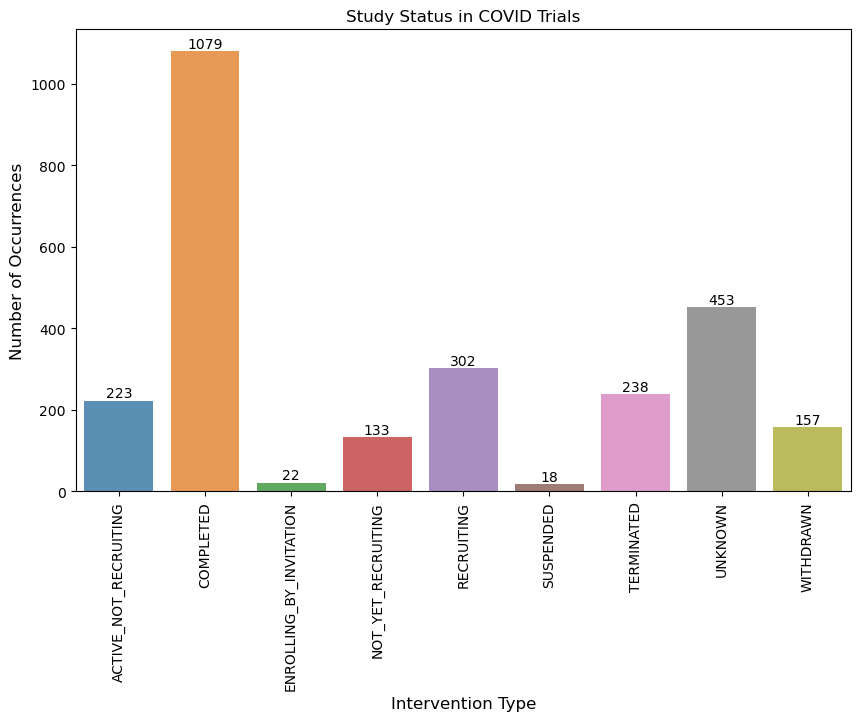

In [7]:
# Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,

def bar_plot(df, title):
    # Count the frequency of each intervention type
    type_counts = df.value_counts()

    # Sort the values alphabetically
    type_counts = type_counts.sort_index()

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x=type_counts.index, y=type_counts.values, alpha=0.8)

    # Add the actual values on top of each bar
    for i, value in enumerate(type_counts.values):
        barplot.text(i, value, value, ha='center', va='bottom')

    plt.title(title)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Intervention Type', fontsize=12)

    # Rotate x labels for better visibility
    plt.xticks(rotation=90)

    plt.show()

bar_plot(breast_cancer_df['Study Status'], 'Study Status in Breast Cancer Trials')
bar_plot(covid_df['Study Status'], 'Study Status in COVID Trials')

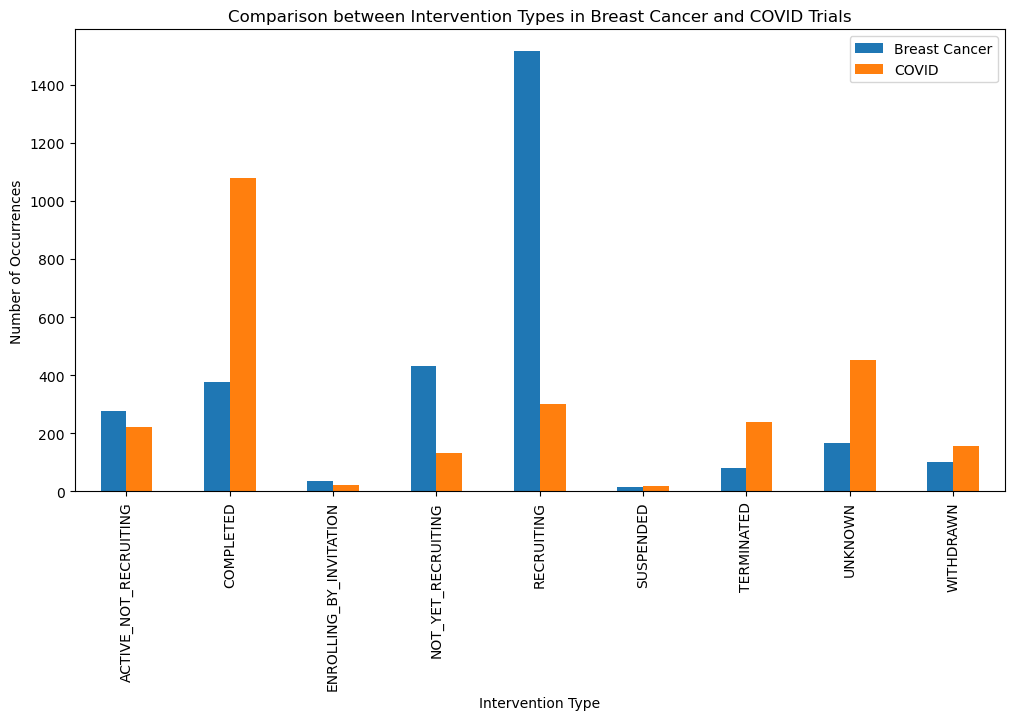

In [8]:
## Side by Side Bar Plot ##

# Count the frequency of each intervention type in each dataset
breast_cancer_studyStatus_counts = breast_cancer_df['Study Status'].value_counts()
covid_counts_studyStatus_counts = covid_df['Study Status'].value_counts()

# Create a new DataFrame with these counts
df = pd.DataFrame({'Breast Cancer': breast_cancer_studyStatus_counts, 'COVID': covid_counts_studyStatus_counts})

# df = df.sort_values(by='Breast Cancer', ascending=False)
# sort alphabetically
df = df.sort_index()

# Fill NaN values with 0
df = df.fillna(0)

# Plot the DataFrame using pandas' built-in plot function
df.plot(kind='bar', figsize=(12, 6))

plt.title('Comparison between Intervention Types in Breast Cancer and COVID Trials')
plt.ylabel('Number of Occurrences')
plt.xlabel('Intervention Type')

plt.show()

In [9]:
# Get the 15 most studied drugs that appeared in trials of each disease
breast_cancer_drugs = breast_cancer_intervention_df['Name'].value_counts().head(15)
print(breast_cancer_drugs)

covid_drugs = covid_intervention_df['Name'].value_counts().head(15)
print(covid_drugs)

Fulvestrant                     90
Pembrolizumab                   80
Trastuzumab                     76
Paclitaxel                      71
Questionnaire Administration    71
Cyclophosphamide                70
Placebo                         69
Carboplatin                     59
Abemaciclib                     53
Capecitabine                    52
Pertuzumab                      51
Biospecimen Collection          50
Letrozole                       46
Quality-of-Life Assessment      44
Palbociclib                     42
Name: Name, dtype: int64
Placebo                535
Hydroxychloroquine      59
Remdesivir              30
Ivermectin              26
Standard of care        26
Azithromycin            25
Standard of Care        21
mRNA-1273               21
Placebo oral tablet     21
BNT162b2                20
Favipiravir             19
Tocilizumab             17
Convalescent Plasma     16
Convalescent plasma     15
SCTV01E                 14
Name: Name, dtype: int64


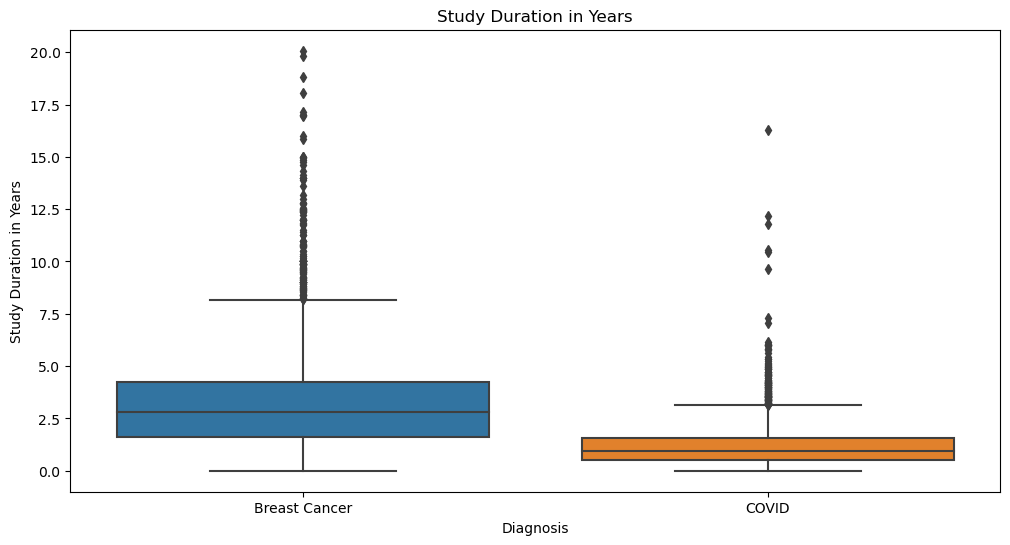

In [10]:
# Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,

# breast_cancer_df['Primary Completion Date'].unique()
# # Count NAs in breast_cancer_df['Primary Completion Date']
# breast_cancer_df['Primary Completion Date'].isna().sum()

# # Do the same thing for Completion Date,First Posted,Results First Posted,Last Update Posted,
# print(breast_cancer_df['Completion Date'].isna().sum())
# print(breast_cancer_df['First Posted'].isna().sum())
# print(breast_cancer_df['Results First Posted'].unique())
# print(breast_cancer_df['Start Date'].isna().sum())


## Get duration
breast_cancer_df['Start Date'] = pd.to_datetime(breast_cancer_df['Start Date'])
breast_cancer_df['Completion Date'] = pd.to_datetime(breast_cancer_df['Completion Date'])
breast_cancer_df['Study Duration'] = breast_cancer_df['Completion Date'] - breast_cancer_df['Start Date']
breast_cancer_df['Study Duration Days'] = breast_cancer_df['Study Duration'].dt.days
breast_cancer_df['Study Duration Days'].mean()
breast_cancer_df['Study Duration Years'] = breast_cancer_df['Study Duration Days'] / 365.25
breast_cancer_df['Study Duration Years'] = breast_cancer_df['Study Duration Years'].round(2)
breast_cancer_df['Study Duration Years'].mean().round(2)

## Do the same thing with Covid
covid_df['Start Date'] = pd.to_datetime(covid_df['Start Date'])
covid_df['Completion Date'] = pd.to_datetime(covid_df['Completion Date'])
covid_df['Study Duration'] = covid_df['Completion Date'] - covid_df['Start Date']
covid_df['Study Duration Days'] = covid_df['Study Duration'].dt.days
covid_df['Study Duration Days'].mean()
covid_df['Study Duration Years'] = covid_df['Study Duration Days'] / 365.25
covid_df['Study Duration Years'] = covid_df['Study Duration Years'].round(2)
covid_df['Study Duration Years'].mean().round(2)

# box plot of breast cancer and covid study duration
plt.figure(figsize=(12, 6))
sns.boxplot(data=[breast_cancer_df['Study Duration Years'], covid_df['Study Duration Years']])
plt.title('Study Duration in Years')
plt.ylabel('Study Duration in Years')
plt.xlabel('Diagnosis')
plt.xticks([0, 1], ['Breast Cancer', 'COVID'])
plt.show()


In [11]:
# Create summary statistics for breast cancer and covid study duration
print(breast_cancer_df['Study Duration Years'].describe())

print(covid_df['Study Duration Years'].describe())

count    3008.000000
mean        3.268484
std         2.473242
min         0.000000
25%         1.590000
50%         2.825000
75%         4.222500
max        20.070000
Name: Study Duration Years, dtype: float64
count    2625.000000
mean        1.209707
std         1.091709
min         0.000000
25%         0.500000
50%         0.960000
75%         1.560000
max        16.280000
Name: Study Duration Years, dtype: float64


Index(['NCT Number', 'Study Title', 'Study URL', 'Acronym', 'Study Status',
       'Brief Summary', 'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures',
       'Other Outcome Measures', 'Sponsor', 'Collaborators', 'Sex', 'Age',
       'Phases', 'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date',
       'First Posted', 'Results First Posted', 'Last Update Posted',
       'Locations', 'Study Documents', 'Study Duration', 'Study Duration Days',
       'Study Duration Years'],
      dtype='object')


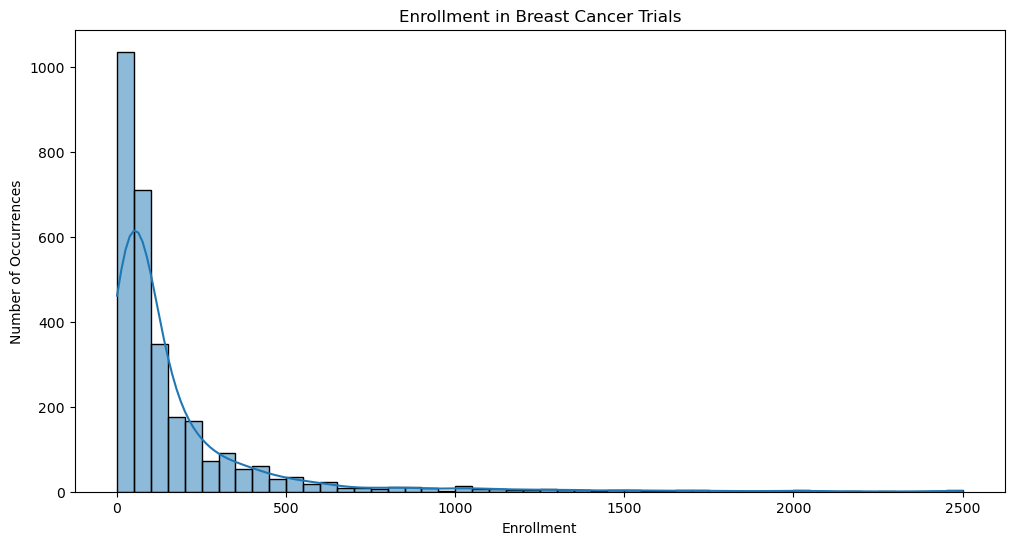

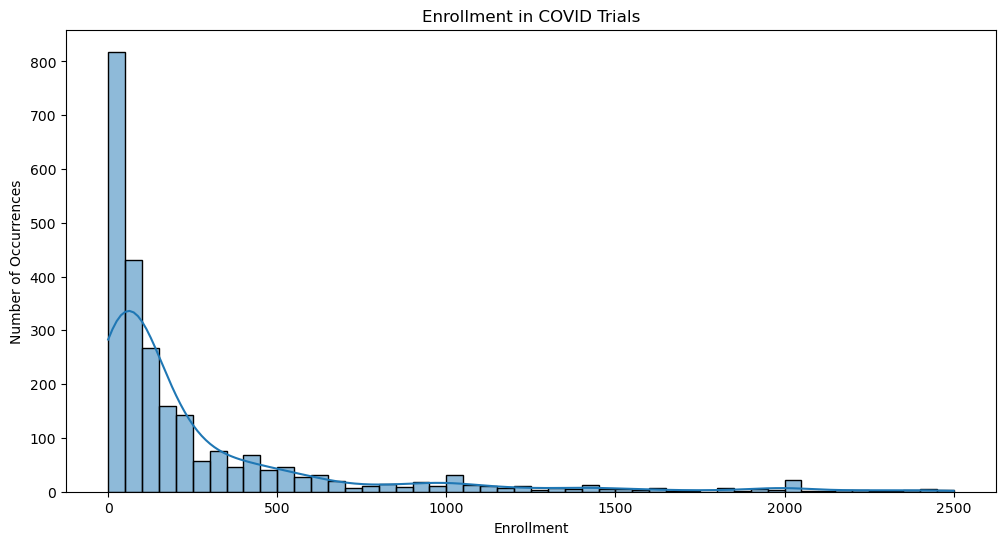

In [32]:
# Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,
print(breast_cancer_df.columns)
breast_cancer_df['Enrollment'].unique()

# Create a histogram of just breast cancer enrollment
plt.figure(figsize=(12, 6))
sns.histplot(breast_cancer_df['Enrollment'], bins=50, kde=True)
plt.title('Enrollment in Breast Cancer Trials')
plt.ylabel('Number of Occurrences')
plt.xlabel('Enrollment')
plt.show()

# Do the same for just covid
plt.figure(figsize=(12, 6))
sns.histplot(covid_df['Enrollment'], bins=50, kde=True)
plt.title('Enrollment in COVID Trials')
plt.ylabel('Number of Occurrences')
plt.xlabel('Enrollment')
plt.show()